Total number of images (X): 1797
Total number of labels (Y): 1797
SVM training completed.
Model Accuracy: 0.8166666666666667


Saving vrsu lab 5.jpg to vrsu lab 5.jpg


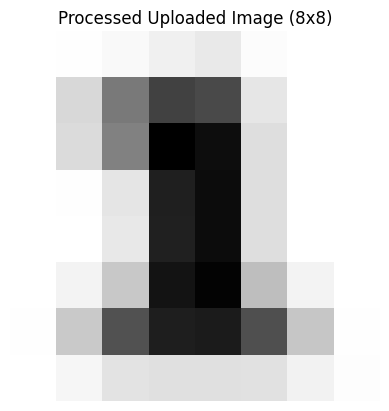

Predicted Digit: 8


In [ ]:
# Classical ML based Object recognition

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from skimage.feature import hog
from skimage.transform import resize

digits = datasets.load_digits()
X = digits.images
y = digits.target

print("Total number of images (X):", X.shape[0])
print("Total number of labels (Y):", y.shape[0])

features = []

for img in X:
    hog_feature = hog(
        img,
        pixels_per_cell=(4, 4),
        cells_per_block=(1, 1),
        orientations=9
    )
    features.append(hog_feature)

features = np.array(features)

X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("SVM training completed.")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

img_resized = resize(img_gray, (8, 8), anti_aliasing=True)

img_resized = img_resized / img_resized.max()
img_resized = 1 - img_resized

plt.imshow(img_resized, cmap='gray')
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')

img_resized = 1 - img_resized

plt.imshow(img_resized, cmap='gray')
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

test_feature = hog(
    img_resized,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    orientations=9
)

prediction = model.predict([test_feature])

print("Predicted Digit:", prediction[0])


Total number of images: 1797
Total number of labels: 1797


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3452 - loss: 2.1817 - val_accuracy: 0.8389 - val_loss: 1.5866
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8127 - loss: 1.3044 - val_accuracy: 0.8917 - val_loss: 0.6305
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9087 - loss: 0.5448 - val_accuracy: 0.9333 - val_loss: 0.3363
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9479 - loss: 0.2930 - val_accuracy: 0.9417 - val_loss: 0.2300
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9571 - loss: 0.2140 - val_accuracy: 0.9556 - val_loss: 0.1812
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9561 - loss: 0.1834 - val_accuracy: 0.9583 - val_loss: 0.1641
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9644 - loss: 0.1618 - val_accuracy: 0.9472 - val_loss: 0.1509
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9777 - loss: 0.1113 - val_accuracy: 0.9528 - val

Saving vrsu lab 5.jpg to vrsu lab 5 (1).jpg


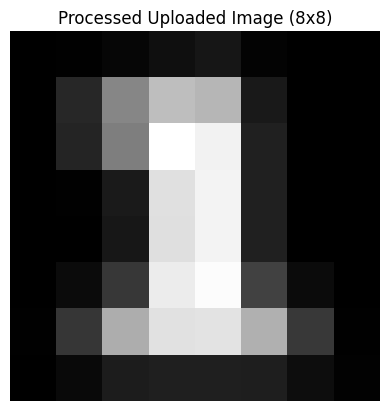

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Digit: 1


In [ ]:
# CNN based Object recognition (Digit Classification)

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from google.colab import files
from skimage.transform import resize

# Load dataset
digits = load_digits()
X = digits.images
y = digits.target

print("Total number of images:", X.shape[0])
print("Total number of labels:", y.shape[0])

# Normalize and reshape for CNN
X = X / 16.0
X = X.reshape(-1, 8, 8, 1)

y = to_categorical(y, 10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Model Accuracy:", accuracy)

# Upload image
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

# Convert to grayscale
if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Resize to 8x8
img_resized = resize(img_gray, (8, 8), anti_aliasing=True)

# Normalize & invert
img_resized = img_resized / img_resized.max()
img_resized = 1 - img_resized

plt.imshow(img_resized, cmap='gray')
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

# Prepare for prediction
img_resized = img_resized.reshape(1, 8, 8, 1)

prediction = model.predict(img_resized)
print("Predicted Digit:", np.argmax(prediction))
